TASK 01: EDA on Retail Data Sales

Name: Suraj Gaikwad

Domain: Data Analytics

Oasis Infobyte Virtual Internship 

In [1]:
# Importing necessary library for further task 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# For using the dataset

df=pd.read_csv("retail_sales_dataset.csv")

In [5]:
# Head will helps us to get the first 5 rows of dataset

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [9]:
# Tail will helps us to get the last 5 rows of dataset

df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [11]:
# this shape will helps us to get the information about the dataset and the correct number of rows and columns
df.shape

(1000, 9)

In [13]:
df.size

9000

In [15]:
#This will helps us to get the all columns name which are present in dataset
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [17]:
# This will helps us to get the all columns name and there datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [19]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [21]:
#This will helps us to know that if dataset has any duplicate values

print('Total number of duplicate values in the dataset is:',df.duplicated().sum())

Total number of duplicate values in the dataset is: 0


In [23]:
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [25]:
df['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

Text(0.5, 1.0, 'Count Plot')

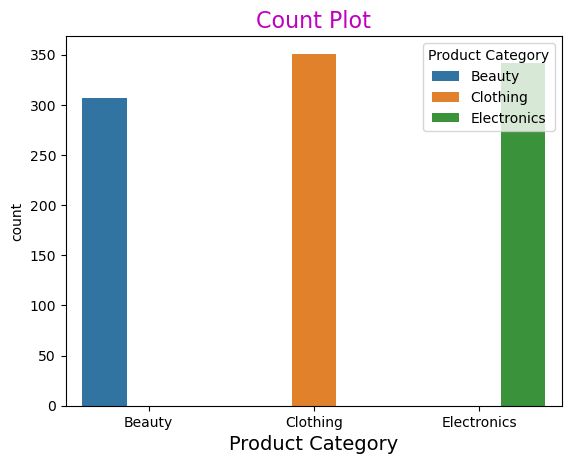

In [29]:

sns.countplot(x='Product Category', hue='Product Category', data=df)
plt.xlabel('Product Category',color='k',size=14)
plt.title('Count Plot',color='m',size=16)

In [31]:
df.groupby('Product Category')[['Quantity','Total Amount']].sum()

,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


In [35]:
first_result=df.groupby('Product Category')['Quantity'].sum()
first_result

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64

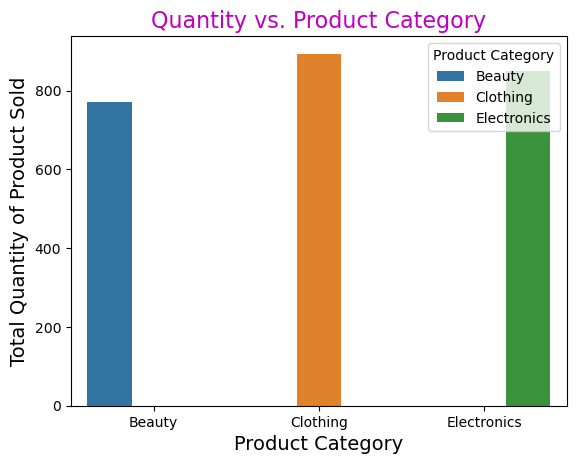

In [41]:
first_result_df = first_result.reset_index(name='Total Quantity of Product Sold')
sns.barplot(x='Product Category', y='Total Quantity of Product Sold', data=first_result_df, hue='Product Category')
plt.xlabel('Product Category',color='k',size=14)
plt.ylabel('Total Quantity of Product Sold',color='k',size=14)
plt.title('Quantity vs. Product Category',color='m',size=16)
plt.show()



1.Maximum Quantity Sold by Clothing Products.

2 .Minimum Quantity Sold by Beauty Products.

In [43]:
second_result=df.groupby('Product Category')['Total Amount'].sum()
second_result

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

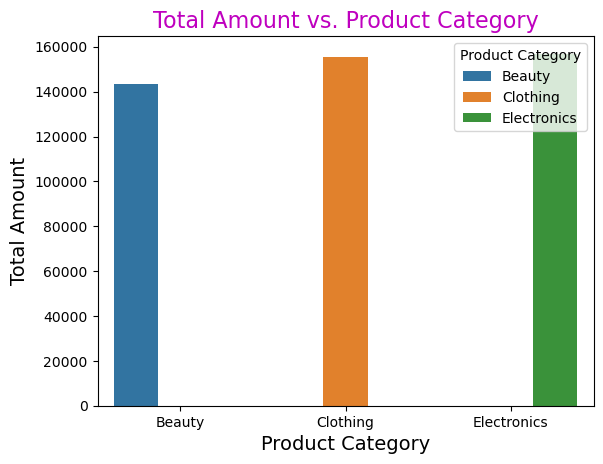

In [45]:
second_result_df = second_result.reset_index(name='Total Amount')
sns.barplot(x='Product Category', y='Total Amount', data=second_result_df, hue='Product Category')
plt.xlabel('Product Category',color='k',size=14)
plt.ylabel('Total Amount',color='k',size=14)
plt.title('Total Amount vs. Product Category',color='m',size=16)
plt.show()

1. Maximun Amount is obtained from Clothing Products.
2 .Minimum Amount is Obtained from Beauty Products

In [47]:
slices=df['Product Category'].value_counts()
print(slices)
categories=['Clothing','Electronics','Beauty']

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


Text(0.5, 1.0, 'Product Category')

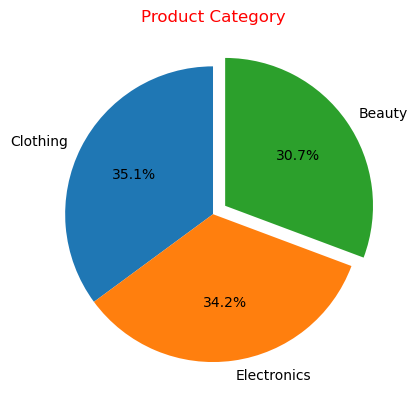

In [49]:
plt.pie(slices,startangle=90,explode=(0,0,0.1),labels=categories,autopct='%1.1f%%')
plt.title('Product Category',color='r')

In [51]:
gen=df['Gender'].value_counts()
gen

Gender
Female    510
Male      490
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender')

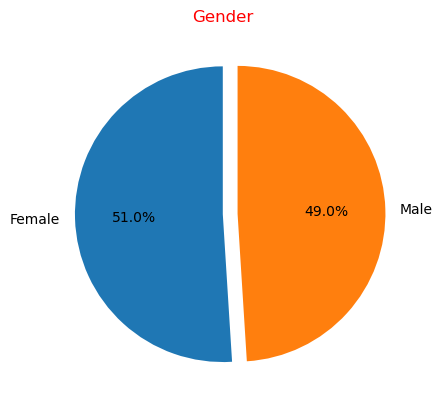

In [53]:
plt.pie(gen,labels=['Female','Male'],explode=(0,0.1),startangle=90,autopct='%1.1f%%')
plt.title('Gender',color='r')

The End